In [56]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Import state generation data (from EIA API but saved as CSV)
state_generation_data = "../Output/All_States_by_source.csv"
state_generation_data_df = pd.read_csv(state_generation_data, encoding="ISO-8859-1")
state_generation_data_df[["State", "Year", "Fuel Type", "Capacity (MWh)"]]

,State,Year,Fuel Type,Capacity (MWh)
0,AK,2021,Coal,168.9
1,AK,2021,Wind,59.0
2,AK,2021,Solar,0.8
3,AK,2021,Petroleum,742.7
4,AK,2021,Natural Gas,1273.1
...,...,...,...,...
8344,WY,1991,Petroleum,5.0
8345,WY,1990,Coal,5553.0
8346,WY,1990,Natural Gas,48.0
8347,WY,1990,Hydroelectric,270.0


In [3]:
#Add a column for "Renewable/Non-Renewable"
state_generation_data_df["Renewable/Non-Renewable"] = ""
state_generation_data_df

,Unnamed: 0,State,Year,Fuel Type,Capacity (MWh),Renewable/Non-Renewable
0,0,AK,2021,Coal,168.9,
1,1,AK,2021,Wind,59.0,
2,2,AK,2021,Solar,0.8,
3,3,AK,2021,Petroleum,742.7,
4,4,AK,2021,Natural Gas,1273.1,
...,...,...,...,...,...,...
8344,8344,WY,1991,Petroleum,5.0,
8345,8345,WY,1990,Coal,5553.0,
8346,8346,WY,1990,Natural Gas,48.0,
8347,8347,WY,1990,Hydroelectric,270.0,


In [15]:
#Confirm the types of fuel types we have in the column
state_generation_data_df["Fuel Type"].unique()

array(['Coal', 'Wind', 'Solar', 'Petroleum', 'Natural Gas',
       'Hydroelectric', 'Nuclear', 'Geothermal'], dtype=object)

In [72]:
# Iterate through the state_generation_data_df DataFrame
for index, row in state_generation_data_df.iterrows():
    #If the fuel type is coal, oil, or gas, write "Non-Renewable" in the new column
    if ((state_generation_data_df.loc[index, "Fuel Type"] == "Coal") or 
        (state_generation_data_df.loc[index, "Fuel Type"] == "Petroleum") or
        (state_generation_data_df.loc[index, "Fuel Type"] == "Natural Gas")):
            
        state_generation_data_df.loc[index, "Renewable/Non-Renewable"] = "Non-Renewable"
        
    #If the fuel type is solar, wind, geopthermal, or hydroelectric, write "Renewable" in the new column
    elif((state_generation_data_df.loc[index, "Fuel Type"] == "Wind") or 
        (state_generation_data_df.loc[index, "Fuel Type"] == "Solar") or
        (state_generation_data_df.loc[index, "Fuel Type"] == "Hydroelectric") or
        (state_generation_data_df.loc[index, "Fuel Type"] == "Geothermal")):
        
        state_generation_data_df.loc[index, "Renewable/Non-Renewable"] = "Renewable"
        
    #If the fuel type is Nuclear write "Non-Renewable *" in the new column 
        #(Nuclear is non-renewable, but I'd like to keep it slightly separate from the carbon-producing
        # sources for the graphs later)
    elif((state_generation_data_df.loc[index, "Fuel Type"] == "Nuclear")):
    
        state_generation_data_df.loc[index, "Renewable/Non-Renewable"] = "Non-Renewable *"
    

state_generation_data_df

,Unnamed: 0,State,Year,Fuel Type,Capacity (MWh),Renewable/Non-Renewable
0,0,AK,2021,Coal,168.9,Non-Renewable
1,1,AK,2021,Wind,59.0,Renewable
2,2,AK,2021,Solar,0.8,Renewable
3,3,AK,2021,Petroleum,742.7,Non-Renewable
4,4,AK,2021,Natural Gas,1273.1,Non-Renewable
...,...,...,...,...,...,...
8344,8344,WY,1991,Petroleum,5.0,Non-Renewable
8345,8345,WY,1990,Coal,5553.0,Non-Renewable
8346,8346,WY,1990,Natural Gas,48.0,Non-Renewable
8347,8347,WY,1990,Hydroelectric,270.0,Renewable


In [53]:
#Create a list of years from the dataframe and sort in ascending order (for plotting later)
years = state_generation_data_df["Year"].unique().astype(int)
years.sort()

In [54]:
print(years)

[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2020 2021]


In [67]:
#Create dataframes for each fuel type
coal_df = state_generation_data_df.loc[state_generation_data_df["Fuel Type"] == "Coal"]
oil_df = state_generation_data_df.loc[state_generation_data_df["Fuel Type"] == "Petroleum"]
gas_df = state_generation_data_df.loc[state_generation_data_df["Fuel Type"] == "Natural Gas"]

solar_df = state_generation_data_df.loc[state_generation_data_df["Fuel Type"] == "Solar"]
hydroelectric_df = state_generation_data_df.loc[state_generation_data_df["Fuel Type"] == "Hydroelectric"]
wind_df = state_generation_data_df.loc[state_generation_data_df["Fuel Type"] == "Wind"]
geothermal_df = state_generation_data_df.loc[state_generation_data_df["Fuel Type"] == "Geothermal"]

nuclear_df = state_generation_data_df.loc[state_generation_data_df["Fuel Type"] == "Nuclear"]

In [68]:
#Sum the total capacity by fuel-type
coal_by_year = coal_df.groupby(["Year"]).sum()["Capacity (MWh)"]
oil_by_year = oil_df.groupby(["Year"]).sum()["Capacity (MWh)"]
gas_by_year = gas_df.groupby(["Year"]).sum()["Capacity (MWh)"]

solar_by_year = solar_df.groupby(["Year"]).sum()["Capacity (MWh)"]
hydroelectric_by_year = hydroelectric_df.groupby(["Year"]).sum()["Capacity (MWh)"]
wind_by_year = wind_df.groupby(["Year"]).sum()["Capacity (MWh)"]
geothermal_by_year = geothermal_df.groupby(["Year"]).sum()["Capacity (MWh)"]

nuclear_by_year = nuclear_df.groupby(["Year"]).sum()["Capacity (MWh)"]

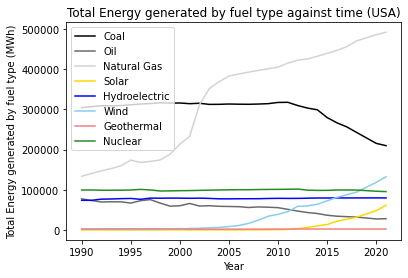

In [84]:
# Plot each fuel type as a separate line
plt.plot(years, coal_by_year, color = "black", label = "Coal")
plt.plot(years, oil_by_year, color = "dimgray", label = "Oil")
plt.plot(years, gas_by_year, color = "lightgray", label = "Natural Gas")

plt.plot(years, solar_by_year, color = "gold", label = "Solar")
plt.plot(years, hydroelectric_by_year, color = "blue", label = "Hydroelectric")
plt.plot(years, wind_by_year, color = "skyblue", label = "Wind")
plt.plot(years, geothermal_by_year, color = "lightcoral", label = "Geothermal")

plt.plot(years, nuclear_by_year, color = "forestgreen", label = "Nuclear")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

#Include titles and axes labels
plt.title("Total Energy generated by fuel type against time (USA)")
plt.xlabel("Year")
plt.ylabel("Total Energy generated by fuel type (MWh)")
plt.savefig("../Output/Images/Fuel_type_vs_time(USA).png", bbox_inches = "tight")
# Print our chart to the screen
plt.show()


In [78]:
#Use the Renewable/Non-Renewable column to create a dataframe for each type
renewables_df = state_generation_data_df.loc[state_generation_data_df["Renewable/Non-Renewable"] == "Renewable"]
nonrenewables_df = state_generation_data_df.loc[state_generation_data_df["Renewable/Non-Renewable"] == "Non-Renewable"]
nonrenewablesbutclean_df = state_generation_data_df.loc[state_generation_data_df["Renewable/Non-Renewable"] == "Non-Renewable *"]

In [80]:
#Sum the capacities by type for plotting
renewables_by_year = renewables_df.groupby(["Year"]).sum()["Capacity (MWh)"]
nonrenewables_by_year = nonrenewables_df.groupby(["Year"]).sum()["Capacity (MWh)"]
nonrenewablesbutclean_df = nonrenewablesbutclean_df.groupby(["Year"]).sum()["Capacity (MWh)"]

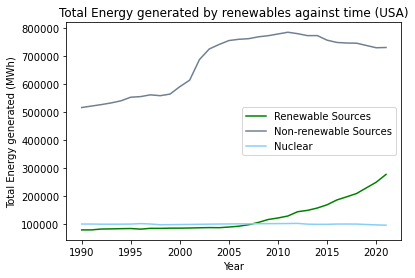

In [85]:
# Plot each fuel type as a separate line
plt.plot(years, renewables_by_year, color = "green", label = "Renewable Sources")
plt.plot(years, nonrenewables_by_year, color = "slategray", label = "Non-renewable Sources")
plt.plot(years, nonrenewablesbutclean_df, color = "lightskyblue", label = "Nuclear")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

#Include titles and axes labels
plt.title("Total Energy generated by renewables against time (USA)")
plt.xlabel("Year")
plt.ylabel("Total Energy generated (MWh)")
plt.savefig("../Output/Images/Renewables_vs_time(USA).png", bbox_inches = "tight")
# Print our chart to the screen
plt.show()


In [82]:
#Pull only the CA data from the dataframe
CA_generation_data_df = state_generation_data_df.loc[state_generation_data_df["State"] == "CA"]
CA_generation_data_df.head()

,Unnamed: 0,State,Year,Fuel Type,Capacity (MWh),Renewable/Non-Renewable
666,666,CA,2021,Coal,57.0,Non-Renewable
667,667,CA,2021,Wind,6175.7,Renewable
668,668,CA,2021,Geothermal,1849.9,Renewable
669,669,CA,2021,Hydroelectric,10267.5,Renewable
670,670,CA,2021,Natural Gas,37040.3,Non-Renewable


In [86]:
#Complete the same renewable/non-renewable analysis on the CA dataframe
CA_renewables_df = CA_generation_data_df.loc[CA_generation_data_df["Renewable/Non-Renewable"] == "Renewable"]
CA_nonrenewables_df = CA_generation_data_df.loc[CA_generation_data_df["Renewable/Non-Renewable"] == "Non-Renewable"]
CA_nonrenewablesbutclean_df = CA_generation_data_df.loc[CA_generation_data_df["Renewable/Non-Renewable"] == "Non-Renewable *"]

In [87]:
#Complete the same renewable/non-renewable analysis on the CA dataframe
CA_renewables_by_year = CA_renewables_df.groupby(["Year"]).sum()["Capacity (MWh)"]
CA_nonrenewables_by_year = CA_nonrenewables_df.groupby(["Year"]).sum()["Capacity (MWh)"]
CA_nonrenewablesbutclean_df = CA_nonrenewablesbutclean_df.groupby(["Year"]).sum()["Capacity (MWh)"]

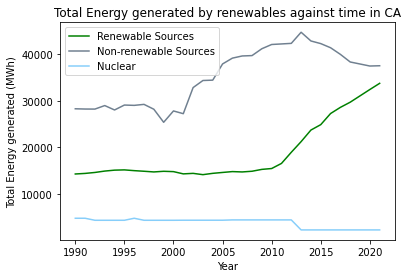

In [88]:
# Plot each fuel type as a separate line
plt.plot(years, CA_renewables_by_year, color = "green", label = "Renewable Sources")
plt.plot(years, CA_nonrenewables_by_year, color = "slategray", label = "Non-renewable Sources")
plt.plot(years, CA_nonrenewablesbutclean_df, color = "lightskyblue", label = "Nuclear")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

#Include titles and axes labels
plt.title("Total Energy generated by renewables against time in CA")
plt.xlabel("Year")
plt.ylabel("Total Energy generated (MWh)")
plt.savefig("../Output/Images/Renewables_vs_time(CA).png", bbox_inches = "tight")
# Print our chart to the screen
plt.show()


In [89]:
#Complete the same by fuel-type analysis on the CA dataframe
CA_coal_df = CA_generation_data_df.loc[CA_generation_data_df["Fuel Type"] == "Coal"]
CA_oil_df = CA_generation_data_df.loc[CA_generation_data_df["Fuel Type"] == "Petroleum"]
CA_gas_df = CA_generation_data_df.loc[CA_generation_data_df["Fuel Type"] == "Natural Gas"]

CA_solar_df = CA_generation_data_df.loc[CA_generation_data_df["Fuel Type"] == "Solar"]
CA_hydroelectric_df = CA_generation_data_df.loc[CA_generation_data_df["Fuel Type"] == "Hydroelectric"]
CA_wind_df = CA_generation_data_df.loc[CA_generation_data_df["Fuel Type"] == "Wind"]
CA_geothermal_df = CA_generation_data_df.loc[CA_generation_data_df["Fuel Type"] == "Geothermal"]

CA_nuclear_df = CA_generation_data_df.loc[CA_generation_data_df["Fuel Type"] == "Nuclear"]

In [90]:
#Complete the same by fuel-type analysis on the CA dataframe
CA_coal_by_year = CA_coal_df.groupby(["Year"]).sum()["Capacity (MWh)"]
CA_oil_by_year = CA_oil_df.groupby(["Year"]).sum()["Capacity (MWh)"]
CA_gas_by_year = CA_gas_df.groupby(["Year"]).sum()["Capacity (MWh)"]

CA_solar_by_year = CA_solar_df.groupby(["Year"]).sum()["Capacity (MWh)"]
CA_hydroelectric_by_year = CA_hydroelectric_df.groupby(["Year"]).sum()["Capacity (MWh)"]
CA_wind_by_year = CA_wind_df.groupby(["Year"]).sum()["Capacity (MWh)"]
CA_geothermal_by_year = CA_geothermal_df.groupby(["Year"]).sum()["Capacity (MWh)"]

CA_nuclear_by_year = CA_nuclear_df.groupby(["Year"]).sum()["Capacity (MWh)"]

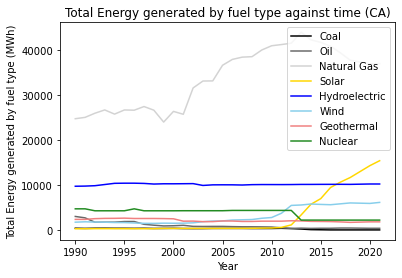

In [91]:
# Plot each fuel type as a separate line
plt.plot(years, CA_coal_by_year, color = "black", label = "Coal")
plt.plot(years, CA_oil_by_year, color = "dimgray", label = "Oil")
plt.plot(years, CA_gas_by_year, color = "lightgray", label = "Natural Gas")

plt.plot(years, CA_solar_by_year, color = "gold", label = "Solar")
plt.plot(years, CA_hydroelectric_by_year, color = "blue", label = "Hydroelectric")
plt.plot(years, CA_wind_by_year, color = "skyblue", label = "Wind")
plt.plot(years, CA_geothermal_by_year, color = "lightcoral", label = "Geothermal")

plt.plot(years, CA_nuclear_by_year, color = "forestgreen", label = "Nuclear")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

#Include titles and axes labels
plt.title("Total Energy generated by fuel type against time (CA)")
plt.xlabel("Year")
plt.ylabel("Total Energy generated by fuel type (MWh)")
plt.savefig("../Output/Images/Fuel_type_vs_time(CA).png", bbox_inches = "tight")
# Print our chart to the screen
plt.show()
